In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
import pandas as pd
import numpy as np
DT=pd.read_csv("Downloads\\delivery_time.csv")
DT

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [63]:
DT.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [64]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

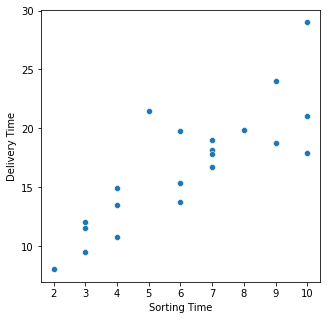

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=DT,palette='set1')

In [66]:
DT.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

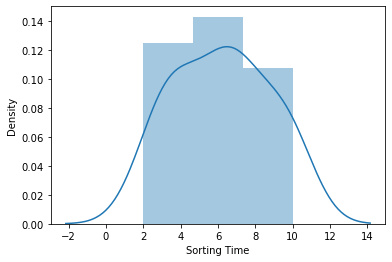

In [67]:
sns.distplot(DT['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

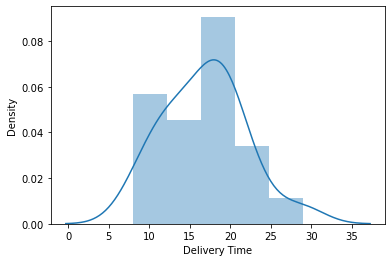

In [68]:
sns.distplot(DT['Delivery Time'])

In [69]:
DT1=DT.rename(columns={'Delivery Time':'dt','Sorting Time':'st'})
DT1

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [75]:
import statsmodels.formula.api as smf


In [76]:
 model=smf.ols("dt~st",data=DT1).fit()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

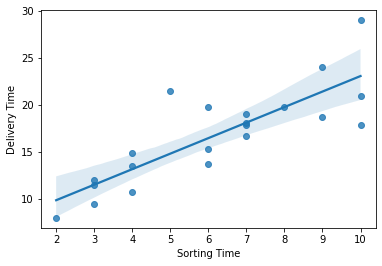

In [77]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=DT)

In [78]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [80]:
DT1['Prediction']=model.fittedvalues
DT1

,dt,st,Prediction
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [81]:
DT1['Error']=model.resid
DT1

,dt,st,Prediction,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [83]:
DT1['Error_Sq']=(DT1['Error'])**2
DT1

,dt,st,Prediction,Error,Error_Sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124
5,15.35,6,16.476853,-1.126853,1.269798
6,19.00,7,18.125873,0.874127,0.764098
7,9.50,3,11.529794,-2.029794,4.120062
8,17.90,10,23.072933,-5.172933,26.759235
9,18.75,9,21.423913,-2.673913,7.149811


In [84]:
Mean_Squared_Error=DT1['Error_Sq'].mean()
Mean_Squared_Error

7.7933115485840645

In [85]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [86]:
DT2=pd.DataFrame(new_data,columns=['st'])
DT2

,st
0,5
1,8


In [87]:
DT2['predicted']=model.predict(DT2)
DT2

,st,predicted
0,5,14.827833
1,8,19.774893
